In [5]:
import math
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def bar_chart(ax, algorithms, normalize_by=None):
    names = [x['algorithm']['name'] for x in algorithms]
    expected_results = [x.get('expected_makespan') for x in algorithms]
    actual_results = [x['makespan'] for x in algorithms]
    if normalize_by:
        actual_results = [x/normalize_by for x in actual_results]
        expected_results = [x/normalize_by for x in expected_results]
        plt.plot([-0.5, len(names)-0.5], [1, 1], color='#C44E52', linewidth=4)
    for i, (expected, actual) in enumerate(zip(expected_results, actual_results)):
        if not math.isnan(expected):
            ax.add_patch(Rectangle((-0.4+i, 0), 0.38, expected, color='#55A868'))
            ax.add_patch(Rectangle(( 0.02 +i, 0), 0.38, actual, color='#4C72B0'))
        else:
            ax.add_patch(Rectangle((-0.4+i, 0), 0.8, actual, color='#4C72B0'))
    plt.xlim(-0.5, len(names)-0.5)
    plt.xticks(range(len(names)), names)

In [6]:
def get_name_by_path(path):
    return path.split("/")[-1].rsplit('.', 1)[0]

def platform_sort_key(item):
    return platform_order.index(get_name_by_path(item[0]))

def algo_sort_key(item):
    return algo_order.index(item['algorithm']['name'])

platform_order = ['simple_3', 'simple_6', 'platform_host', 'platform_rack', 'platform_cluster']
algo_order = ['HEFT', 'EHEFT', 'Lookahead']

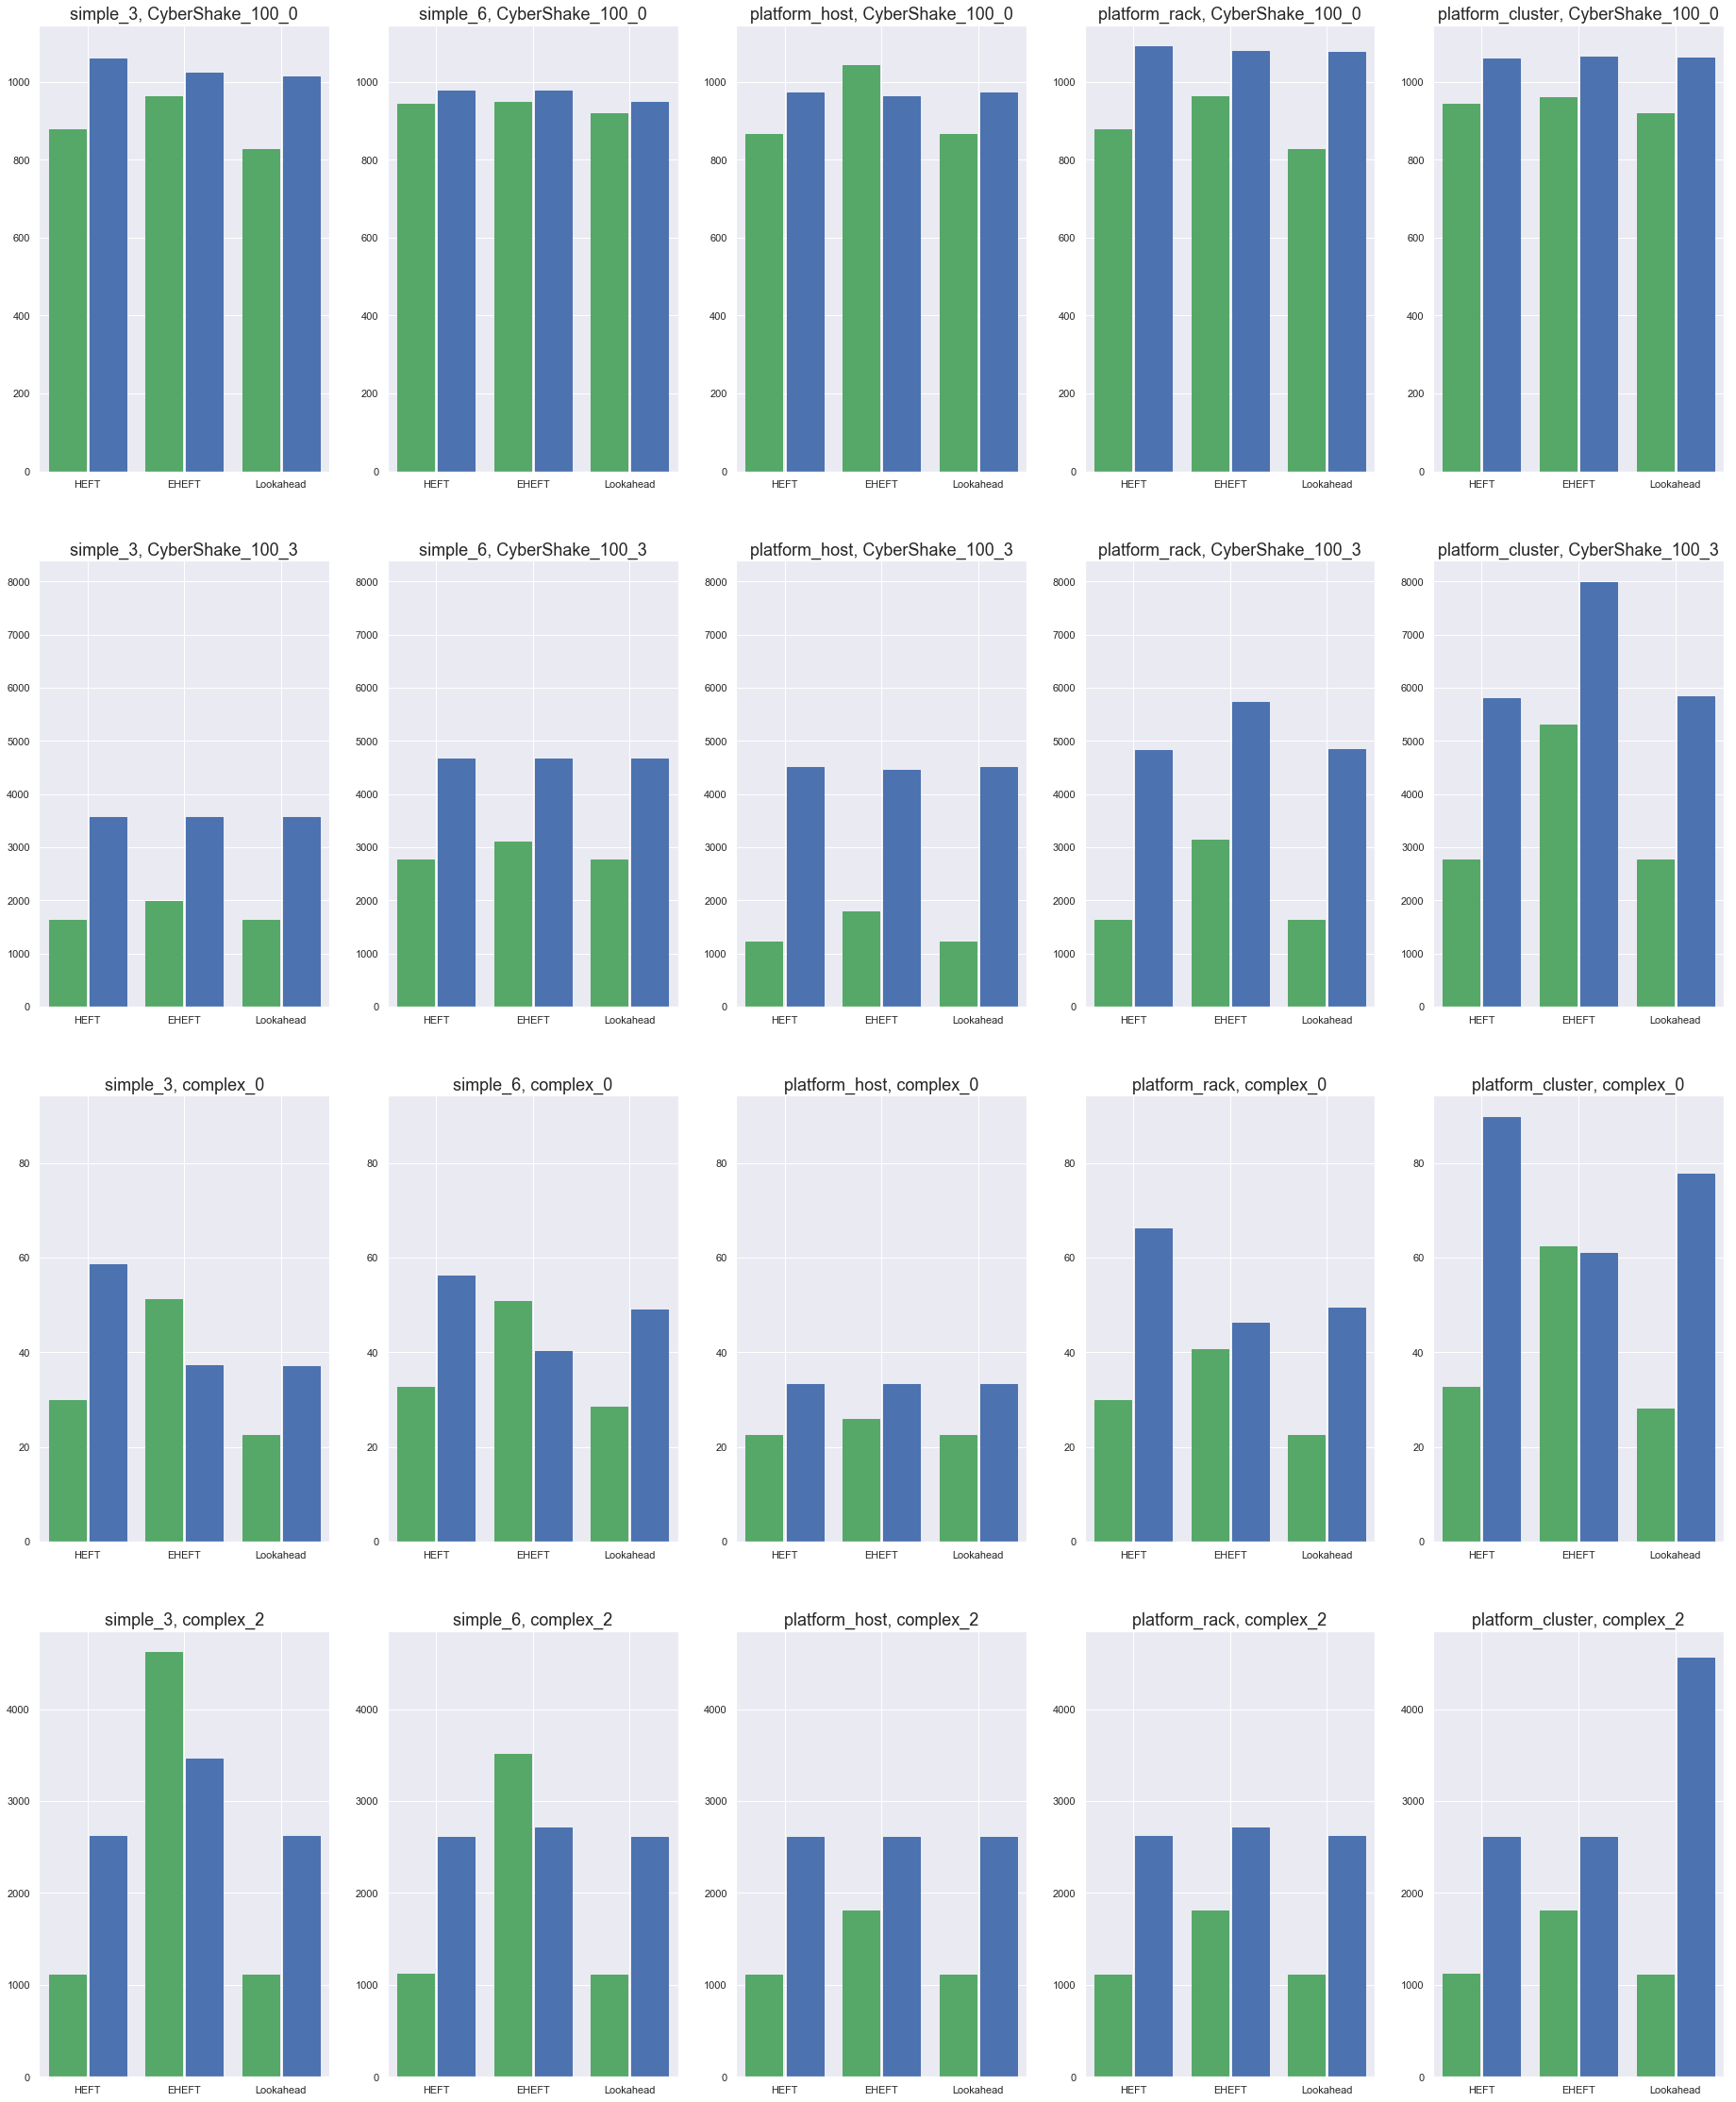

In [7]:
import json
results = json.load(open('output'))
by_platform_and_worflow = {}
for r in results:
    if 'simple_' in r['tasks']:
        continue
    by_platform_and_worflow.setdefault(r['tasks'], {})
    by_platform_and_worflow[r['tasks']].setdefault(r['platform'], [])
    by_platform_and_worflow[r['tasks']][r['platform']].append(r)

plt.figure(figsize=(32, 40))
counter = 1
for i, (workflow, workflow_results) in enumerate(sorted(by_platform_and_worflow.items())):
    max_res = 0
    for platform_results in workflow_results.values():
        expected = [x['expected_makespan'] for x in platform_results if not math.isnan(x['expected_makespan'])] or [max_res]
        max_res = max(
             max_res,
             max([x['makespan'] for x in platform_results]),
             max(expected)
         )
    for j, (platform, platform_results) in enumerate(sorted(workflow_results.items(), key=platform_sort_key)):
        ax = plt.subplot(len(by_platform_and_worflow), len(workflow_results), counter)
        plt.ylim(top=max_res*1.05)
        bar_chart(ax, sorted(platform_results, key=algo_sort_key))
        platform = get_name_by_path(platform)
        workflow = get_name_by_path(workflow)
        plt.title(f'{platform}, {workflow}', fontsize=18)
        counter += 1
plt.savefig('charts.png')

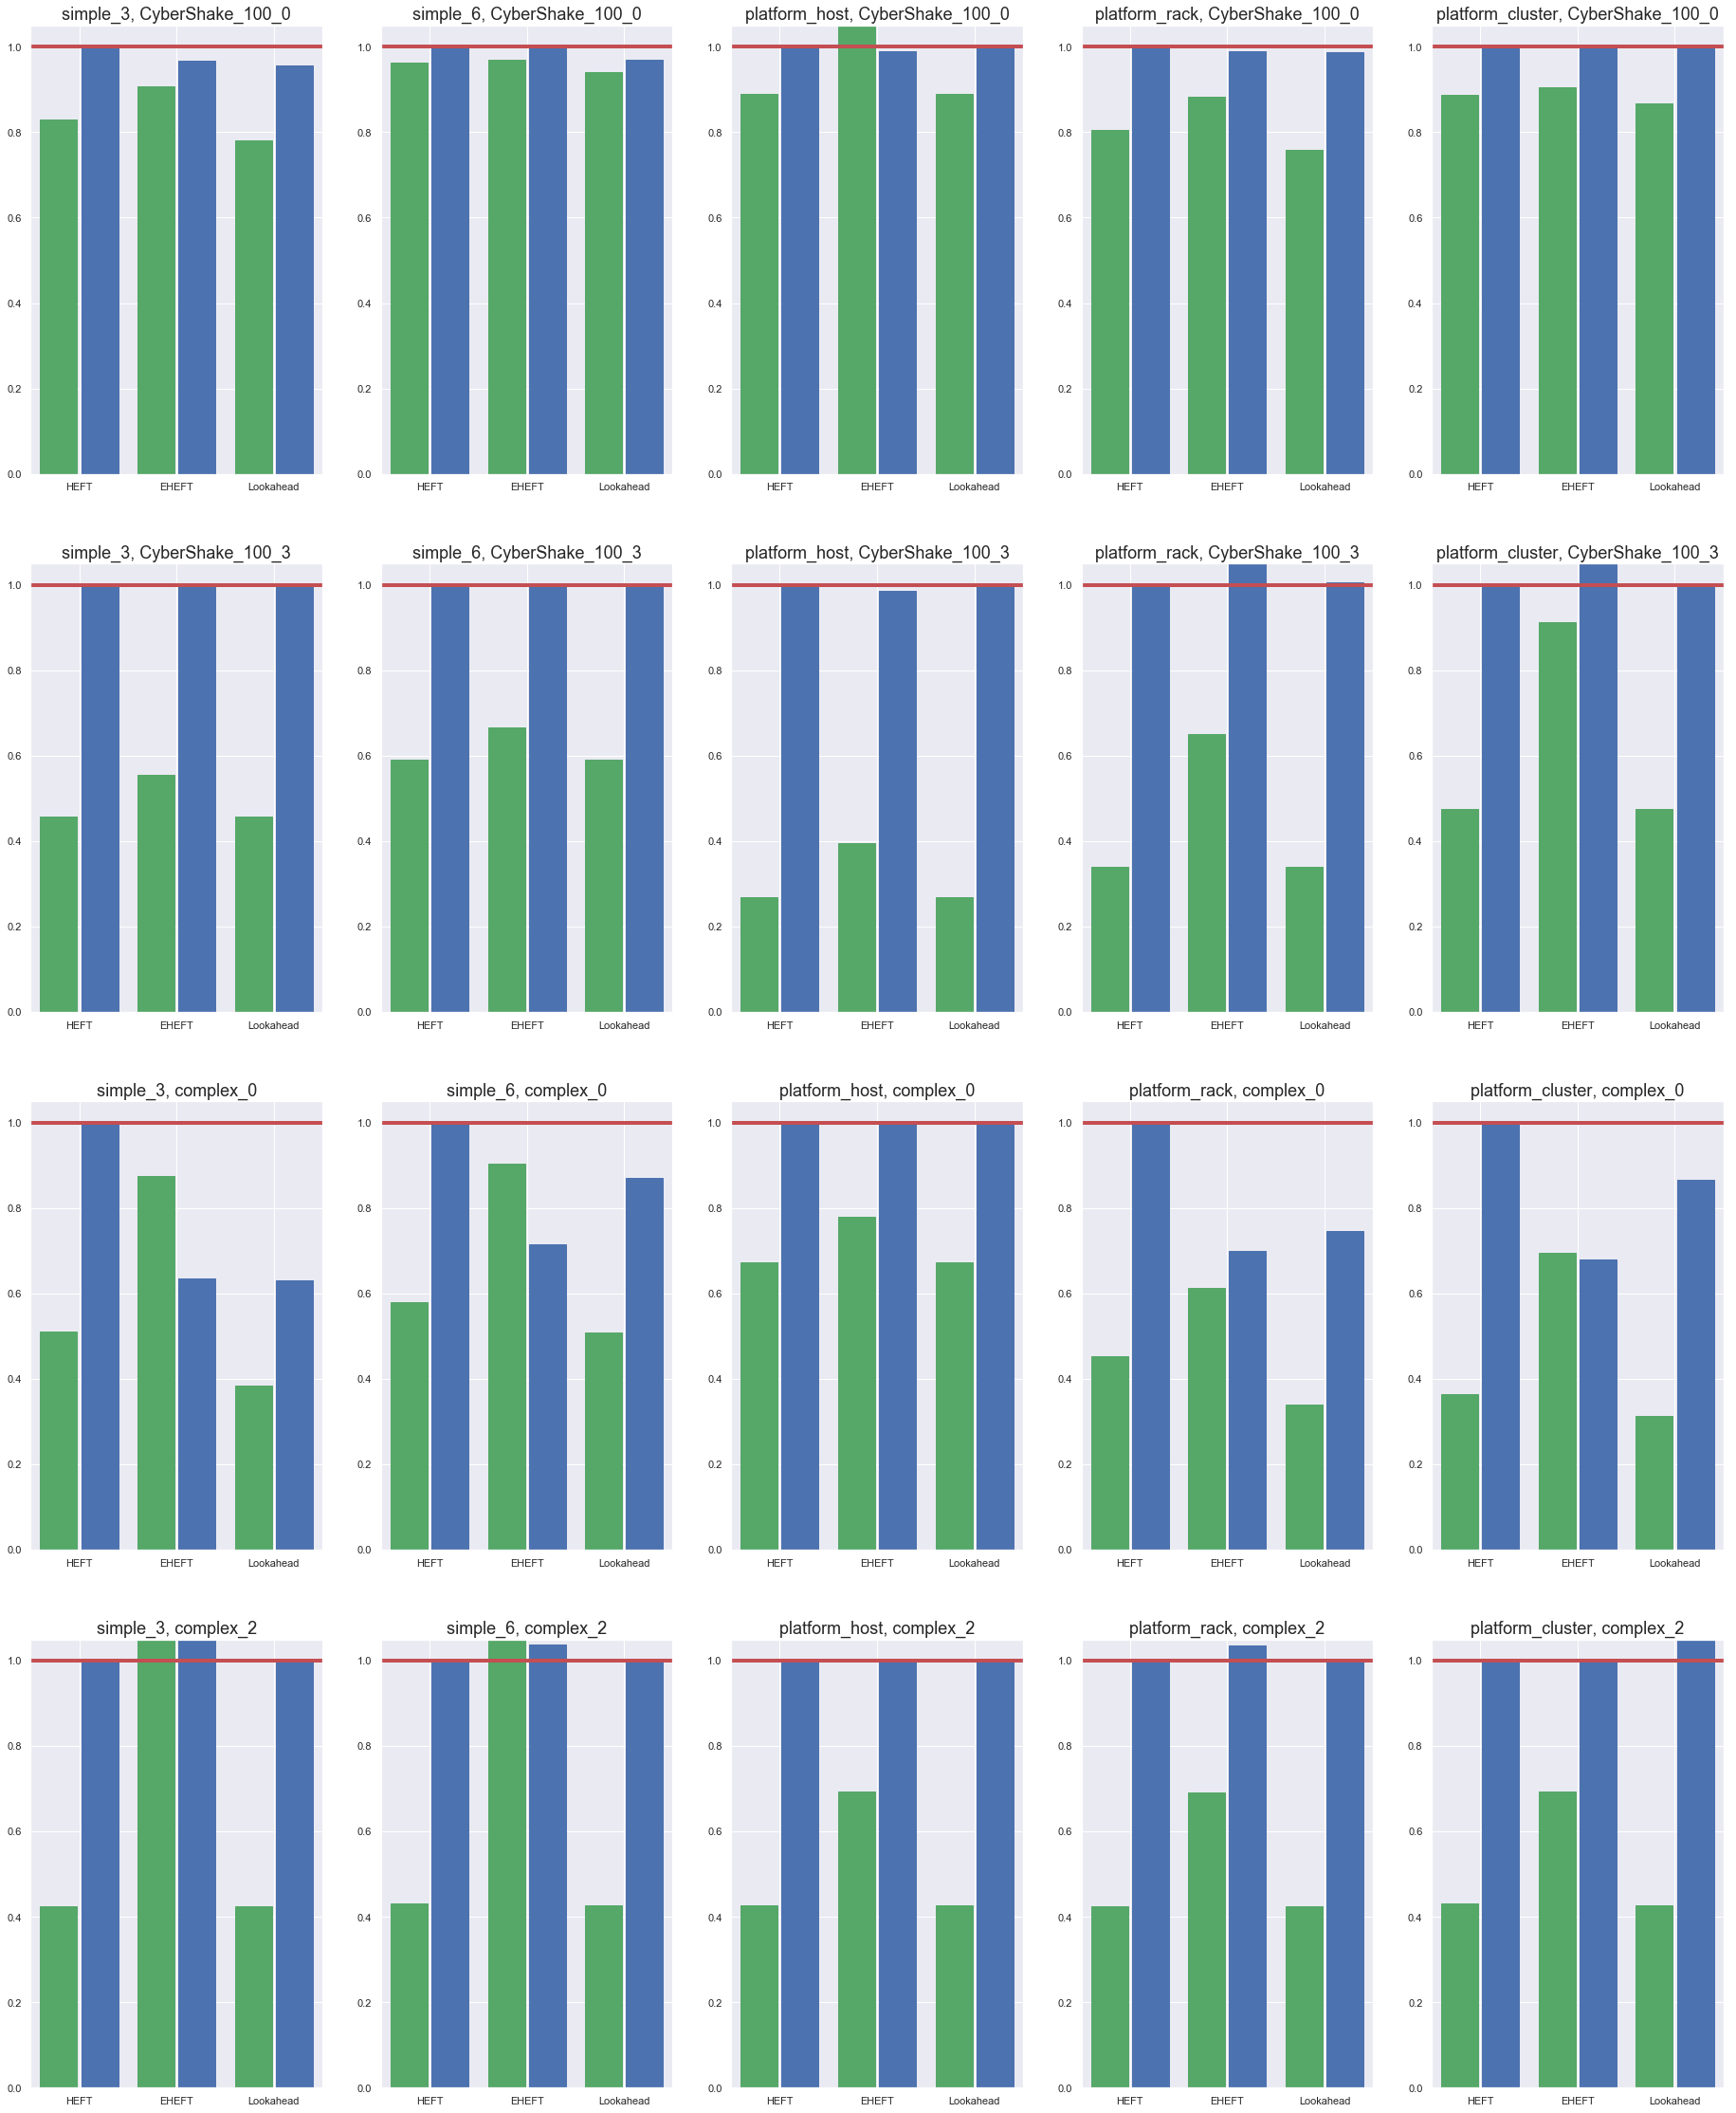

In [8]:
import json
results = json.load(open('output'))
by_platform_and_worflow = {}
for r in results:
    if 'simple_' in r['tasks']:
        continue
    by_platform_and_worflow.setdefault(r['tasks'], {})
    by_platform_and_worflow[r['tasks']].setdefault(r['platform'], [])
    by_platform_and_worflow[r['tasks']][r['platform']].append(r)

plt.figure(figsize=(32, 40))
counter = 1
for i, (workflow, workflow_results) in enumerate(sorted(by_platform_and_worflow.items())):
    max_res = 0
    for platform_results in workflow_results.values():
         max_res = max(max_res, max([x['makespan'] for x in platform_results]))
    for j, (platform, platform_results) in enumerate(sorted(workflow_results.items(), key=platform_sort_key)):
        ax = plt.subplot(len(by_platform_and_worflow), len(workflow_results), counter)
        baseline = platform_results[0]['makespan']
        plt.ylim(top=1.05)
        bar_chart(ax, platform_results, normalize_by=baseline)
        platform = platform.split("/")[-1].rsplit('.', 1)[0]
        workflow = workflow.split("/")[-1].rsplit('.', 1)[0]
        plt.title(f'{platform}, {workflow}', fontsize=18)
        counter += 1
plt.savefig('charts_percentage.png')